>笔记：pandas专门为处理表格和混杂数据设计的，numpy更适合处理统一的数值数组数据。

In [3]:
import pandas as pd

In [4]:
from pandas import Series, DataFrame

## Series

In [6]:
obj = pd.Series([4,7,-5,3])

In [7]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [8]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [9]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [10]:
obj2 = pd.Series([4,7,-5,3],index = ['d','b','a','c'])

In [12]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [13]:
obj2['d']=6

In [16]:
obj2[['c','a','d']]

c    3
a   -5
d    6
dtype: int64

In [17]:
obj2[obj2>0]

d    6
b    7
c    3
dtype: int64

In [18]:
obj2*2

d    12
b    14
a   -10
c     6
dtype: int64

In [19]:
'b' in obj2

True

In [20]:
'e' in obj2

False

In [21]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [22]:
obj3= pd.Series(sdata)#通过python字典创建Series

In [23]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [24]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [26]:
obj4 = pd.Series(sdata,index = states)

In [27]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [28]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [29]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [31]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [33]:
obj3+obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [34]:
obj4.name = 'population'

In [35]:
obj4.index.name = 'state'

In [36]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [37]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [38]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

In [39]:
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

## DataFrame

>笔记：DataFrame每列可以是不同的值类型（数值、字符串、布尔值等）

In [6]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [42]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [43]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [44]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [7]:
frame2 = pd.DataFrame(data, 
                      columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four','five', 'six'])

In [46]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [47]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [48]:
frame2['state']#这是一个Series

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [49]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

>笔记：IPython提供了类似属性的访问（即frame2.year）和tab补全。 frame2[column]适用于任何列的名，但是frame2.column只有在列名是一个合理的Python变量名时才适用。

In [8]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [9]:
frame2['debt'] = 16.5

In [10]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [11]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [12]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


>注意：不能用frame2.eastern创建新的列。

In [13]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

>注意：通过索引方式返回的列只是相应数据的视图而已，并不是副本。因此，对返回的Series所做的任何就地修改全都会反映到源DataFrame上。通过Series的copy方法即可指定复制列。

In [18]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},'Ohio': {2001: 1.7,2000: 1.5, 2002: 3.6}}

In [19]:
frame3 = pd.DataFrame(pop)#外层字典的键作为列，内层键则作为行索引

In [20]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [17]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


>内层字典的键会被合并、排序以形成最终的索引。

In [24]:
pdata = {'Ohio': frame3['Ohio'][:-1],'Nevada': frame3['Nevada'][:2]}

In [25]:
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


![jupyter](http://upload-images.jianshu.io/upload_images/7178691-106835b28c0cea5a.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

In [26]:
frame3.index.name = 'year'; frame3.columns.name = 'state'

In [27]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [28]:
frame3.values#返回ndarray

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [29]:
frame2.values#返回ndarray，兼容所有列的数据类型

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

## 索引对象

In [30]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index

In [31]:
index[1]='d'#index对象不可变

TypeError: Index does not support mutable operations

>index的不可变可以使Index对象在多个数据结构之间安全共享

In [33]:
import numpy as np
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [34]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [35]:
obj2.index is labels

True

>与python的集合不同，pandas的Index可以包含重复的标签

In [36]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

![jupyter](http://upload-images.jianshu.io/upload_images/7178691-5499d14f0e2cd639.jpg?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

# 5.2 基本功能 

## 重新索引

In [37]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [38]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])#reindex将会根据新索引进行重排。如果某个索引值当前不存在，就引入缺失值

In [39]:
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [40]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [41]:
obj3.reindex(range(6), method='ffill')#插值处理。method选项即可达到此目的，使用ffill可以实现前向值填充

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [42]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [43]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])#reindex可以修改（行）索引和列。只传递一个序列时，会重新索引结果的行
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [44]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)#列可以用columns关键字重新索引

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


![jupyter](http://upload-images.jianshu.io/upload_images/7178691-efa3dbd4b83c61ec.jpg?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

## 丢弃指定轴上的项

In [45]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [46]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [47]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [48]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [49]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [50]:
data.drop(['Colorado','Ohio'])#默认axis=0

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [51]:
data.drop('two', axis=1)#需要明确删除的轴（非默认）

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [52]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [53]:
obj.drop('c', inplace=True)#就地修改对象——inplace=True

In [54]:
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

## 索引、选取和过滤

In [55]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [56]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [57]:
obj[['b', 'a', 'd']]#Series的索引值不只是整数

b    1.0
a    0.0
d    3.0
dtype: float64

In [58]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [59]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

>注意：利用标签的切片运算与普通的Python切片运算不同，其末端是包含的

In [61]:
obj['b':'c'] = 5  #就地修改
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [62]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [63]:
data['two']#对DataFrame进行索引其实就是获取一个或多个列

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [66]:
data['Ohio']#用一个值或序列对DataFrame进行索引不能获取行

KeyError: 'Ohio'

In [67]:
data[:2]#切片获取行数据

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [68]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [69]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [70]:
data[data<5]=0

In [71]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


## 用loc和iloc进行选取

In [75]:
data.loc['Utah']#用loc对DataFrame的行的标签索引，返回Series

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [76]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [77]:
data.iloc[2, [3, 0, 1]]#花式索引

four    11
one      8
two      9
Name: Utah, dtype: int32

In [78]:
data.iloc[[1, 2], [3, 0, 1]]#返回DataFrame

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [82]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


In [83]:
data.one

Ohio         0
Colorado     0
Utah         8
New York    12
Name: one, dtype: int32

In [84]:
data.Ohio#只能data.column

AttributeError: 'DataFrame' object has no attribute 'Ohio'

![jupyter](https://upload-images.jianshu.io/upload_images/7178691-64354f2ab777bd8c.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

## 整数索引

In [85]:
ser = pd.Series(np.arange(3.))
ser
ser[-1]#对于整数索引会产生歧义

KeyError: -1

In [86]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]#对于非整数索引，不会产生歧义

2.0

In [87]:
ser.iloc[:1]#为了进行统一，如果轴索引含有整数，数据选取总会使用标签。为了更准确，请使用loc（标签）或iloc（整数）

0    0.0
dtype: float64

## 算术运算和数据对齐

>pandas最重要的一个功能是，它可以对不同索引的对象进行算术运算。在将对象相加时，如果存在不同的索引对，则结果的索引就是该索引对的并集。

In [88]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],index=['a', 'c', 'e', 'f', 'g'])

In [89]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [90]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [91]:
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [92]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [93]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [94]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [95]:
df1+df2 #ataFrame对象相加，没有共用的列或行标签，结果都会是空

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


## 在算术方法中填充值

In [96]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [97]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [98]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [99]:
df1.add(df2,fill_value=0)#当一个对象中某个轴标签在另一个对象中找不到时填充一个特殊值0

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


![灵活的算术方法](http://upload-images.jianshu.io/upload_images/7178691-16857a1021f98d1f.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

In [100]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


## DataFrame和Series之间的运算

In [101]:
arr = np.arange(12.).reshape((3, 4))
arr - arr[0]#当我们从arr减去arr[0]，每一行都会执行这个操作,这就叫做广播（broadcasting）

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [2]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
   .....:                      columns=list('bde'),
   .....:                      index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [104]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [105]:
frame - series#boardcast

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [106]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
frame + series2 #如果某个索引值在DataFrame的列或Series的索引中找不到，则参与运算的两个对象就会被重新索引以形成并集

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [4]:
frame.sub(series3)#subtraction,but matching the column by default

,Ohio,Oregon,Texas,Utah,b,d,e
Utah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ohio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oregon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
frame.sub(series3,axis='index')#subtraction, hope to match the index by using(axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


## 函数应用和映射

In [17]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
   .....:                      index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [18]:
frame

,b,d,e
Utah,-0.316921,-0.003192,-0.848426
Ohio,-1.522409,-0.061146,0.113989
Texas,1.468783,-0.856999,-1.596124
Oregon,-0.572856,-0.653404,-0.228951


In [19]:
np.abs(frame)

,b,d,e
Utah,0.316921,0.003192,0.848426
Ohio,1.522409,0.061146,0.113989
Texas,1.468783,0.856999,1.596124
Oregon,0.572856,0.653404,0.228951


In [20]:
f = lambda x : x.max() - x.min() #function: calculating the difference between the max and the min within a Series
frame.apply(f)#matching the index by default

b    2.991192
d    0.853807
e    1.710113
dtype: float64

In [21]:
frame.apply(f,axis='columns')# x belongs to 'bde'

Utah      0.845234
Ohio      1.636398
Texas     3.064907
Oregon    0.424453
dtype: float64

In [22]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])# function can return several values

In [23]:
frame.apply(f)

,b,d,e
min,-1.522409,-0.856999,-1.596124
max,1.468783,-0.003192,0.113989


In [25]:
format = lambda x: '%.2f' % x #change the format(Python function)
frame.applymap(format)

,b,d,e
Utah,-0.32,-0.00,-0.85
Ohio,-1.52,-0.06,0.11
Texas,1.47,-0.86,-1.60
Oregon,-0.57,-0.65,-0.23


In [26]:
frame['e'].map(format)#Series 用于应用元素级函数的map方法

Utah      -0.85
Ohio       0.11
Texas     -1.60
Oregon    -0.23
Name: e, dtype: object

## 排序和排名

In [27]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()#对行或列索引进行排序（按字典顺序）

a    1
b    2
c    3
d    0
dtype: int64

In [28]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
   .....:                      index=['three', 'one'],
   .....:                      columns=['d', 'a', 'b', 'c'])

In [29]:
frame.sort_index()#sort the index by default

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [30]:
frame.sort_index(axis='columns')#hoping to sort the columns in ascending order by default

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [31]:
frame.sort_index(axis='columns',ascending=False)#hoping to sort the columns in descending order

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [33]:
obj = pd.Series([4,7,-3,2])
obj.sort_values()# sort the Series

2   -3
3    2
0    4
1    7
dtype: int64

In [34]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()#任何缺失值默认都会被放到Series的末尾

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [35]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [36]:
frame.sort_values(by='b')#根据一个或多个列中的值进行排序(by选项)

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [37]:
frame.sort_values(by=['a','b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [3]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()#为各组分配一个平均排名

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [4]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [7]:
obj.rank(ascending=False,method='max')#'max'——平级时取最大值

0    1.0
1    7.0
2    1.0
3    3.0
4    5.0
5    6.0
6    3.0
dtype: float64

In [12]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
   .....:                       'c': [-2, 5, 8, -2.5]})
frame.sort_index(axis='columns')

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [14]:
frame.rank(axis='columns').sort_index(axis=1)

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


## 带有重复标签的轴索引

In [15]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [16]:
obj.index.is_unique

False

In [17]:
obj['a']

a    0
a    1
dtype: int64

In [18]:
obj['c']

4

In [19]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,0.863722,0.892225,-0.418007
a,-0.117150,1.180831,-1.847915
b,-0.382258,0.771570,0.140019
b,-0.471035,-1.480026,-1.053726


In [20]:
df.loc['b']

,0,1,2
b,-0.382258,0.771570,0.140019
b,-0.471035,-1.480026,-1.053726


# 5.3 汇总和计算描述统计

In [5]:
import pandas as pd
import numpy as np
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],[np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


调用DataFrame的sum方法将会返回一个含有列的和的Series：

In [6]:
df.sum()

one    9.25
two   -5.80
dtype: float64

传入axis='columns'或axis=1将会按行进行求和运算：

In [7]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

NA值会自动被排除，除非整个切片（这里指的是行或列）都是NA。通过skipna选项可以禁用该功能：

In [8]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

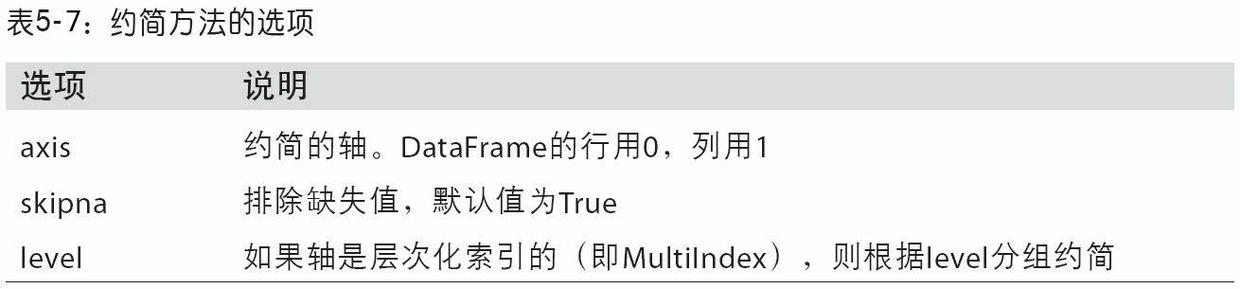

有些方法（如idxmin和idxmax）返回的是间接统计（比如达到最小值或最大值的索引）：

In [9]:
df.idxmax()

one    b
two    d
dtype: object

In [10]:
#另一些方法则是累计型的：
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


还有一种方法，它既不是约简型也不是累计型。describe就是一个例子，它用于一次性产生多个汇总统计：

In [11]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


## 唯一值、值计数以及成员资格

In [12]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
#1. 得到Series中的唯一值数组
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [14]:
#2.相似的，value_counts用于计算一个Series中各值出现的频率：
obj.value_counts()

a    3
c    3
d    1
b    2
dtype: int64

In [16]:
pd.value_counts(obj.values, sort=True)

c    3
a    3
b    2
d    1
dtype: int64

In [17]:
#3. isin用于判断矢量化集合的成员资格，可用于过滤Series中或DataFrame列中数据的子集：
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [18]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [19]:
#与isin类似的是Index.get_indexer方法，它可以给你一个索引数组，从可能包含重复值的数组到另一个不同值的数组：
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a','d'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([ 0,  2,  1,  1,  0,  2, -1], dtype=int64)

In [20]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [21]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


# 第06章 数据加载、存储与文件格式

## 6.1 读写文本格式的数据

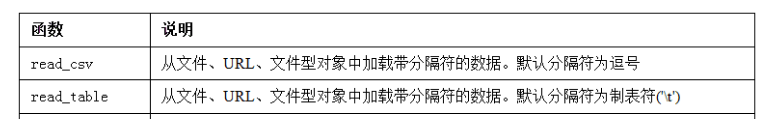

In [23]:
df = pd.read_csv('test.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [25]:
#不要标题行
pd.read_csv('test.csv', header=None)

,0,1,2,3,4
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [26]:
#自己定义列名
pd.read_csv('test.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [30]:
#过index_col参数指定"message"：
names=['a', 'b', 'c', 'd', 'message']
pd.read_csv('test.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
message,a,b,c,d
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


这里的字段是被数量不同的空白字符间隔开的。这种情况下，你可以传递一个正则表达式作为read_table的分隔符。可以用正则表达式表达为\s+
result = pd.read_table('examples/ex3.txt', sep='\s+')

In [28]:
#你可以用skiprows跳过文件的第一行、第二行：
pd.read_csv('test.csv', skiprows=[0,1])

,5,6,7,8,world
0,9,10,11,12,foo


In [32]:
result = pd.read_csv('test.csv')
result

,a,b,c,d,message
0,1,2.0,3,4.0,hello
1,5,6.0,7,8.0,world
2,9,10.0,11,12.0,foo
3,13,NaN,14,NaN,AA


In [ ]:
#判断是否是空 
pd.isnull(result)

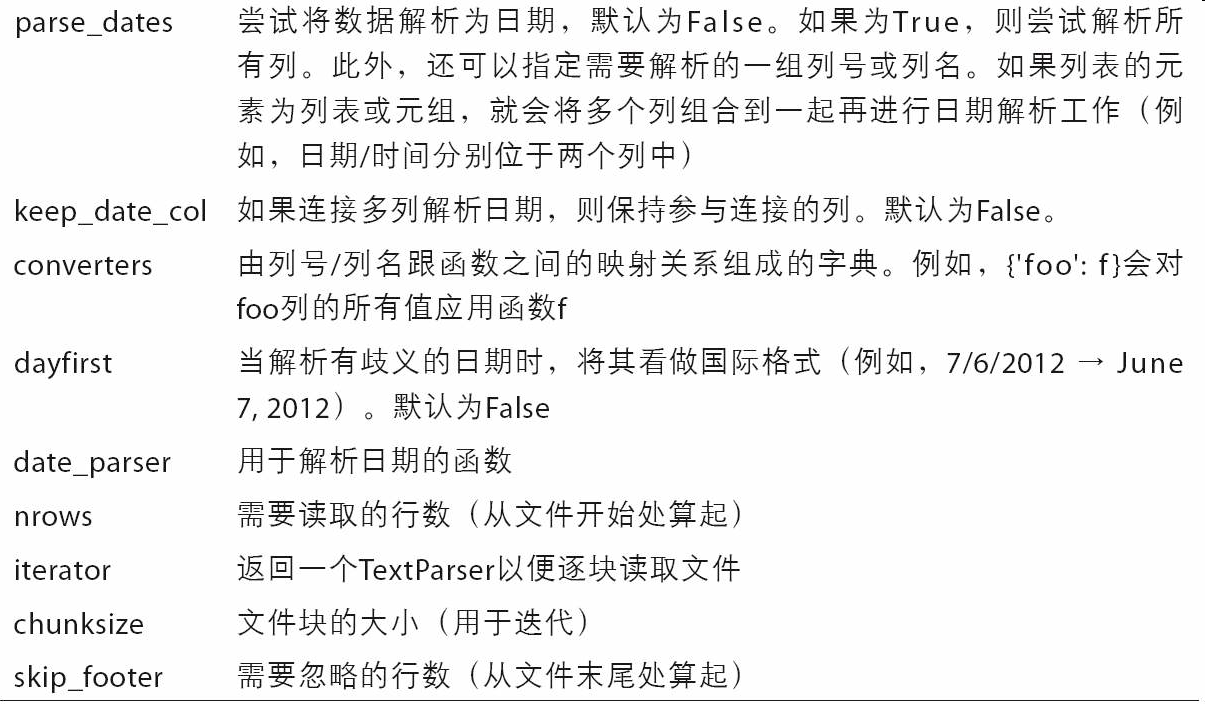

## 逐块读取文本文件

In [38]:
#如果只想读取几行（避免读取整个文件），通过nrows进行指定即可：
pd.read_csv('test.csv', nrows=3)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


## 将数据写出到文本格式

利用DataFrame的to_csv方法，我们可以将数据写到一个以逗号分隔的文件中：

In [34]:
data = pd.read_csv('test.csv')
data.to_csv('return.csv')

In [35]:
#不要列和行标签
data.to_csv('return.csv', index=False, header=False)

#此外，你还可以只写出一部分的列，并以你指定的顺序排列：
#data.to_csv('test.csv', index=False, columns=['a', 'b', 'c'])

## 处理分隔符格式
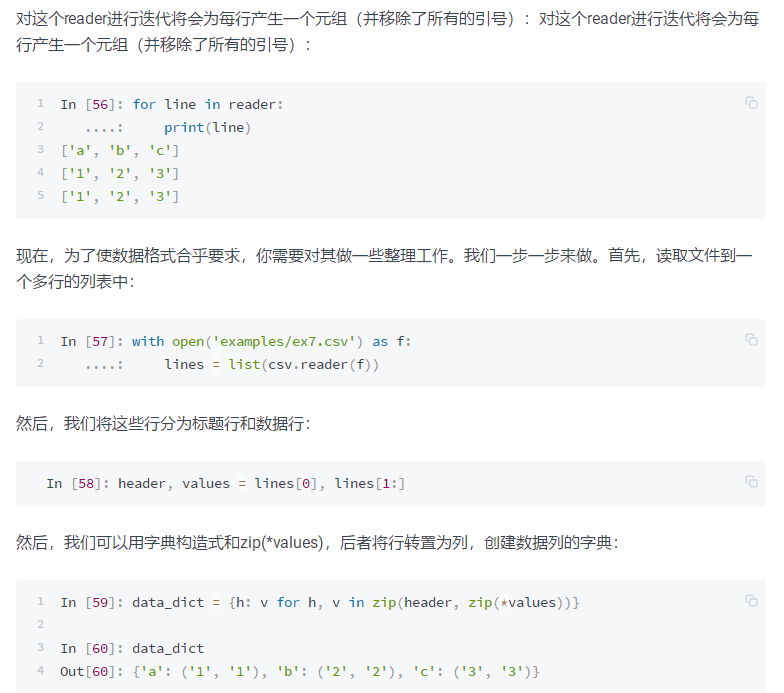

# 6.2 二进制数据格式

## 使用HDF5格式

HDF5是一种存储大规模科学数组数据的非常好的文件格式。HDF5中的HDF指的是层次型数据格式（hierarchical data format）。每个HDF5文件都含有一个文件系统式的节点结构，它使你能够存储多个数据集并支持元数据。

In [3]:
import pandas as pd
import numpy as np
frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject

## 读取Microsoft Excel文件

In [2]:
import pandas as pd
import numpy as np
#pd读excel
pd.read_excel('test.xlsx', 'Sheet1')

,a,b,c,d,message
0,1,2.0,3,4.0,hello
1,5,6.0,7,8.0,world
2,9,10.0,11,12.0,foo
3,13,NaN,14,NaN,AA


In [5]:
#pd写excel
writer = pd.ExcelWriter('test.xlsx')
frame=pd.read_excel(writer, 'Sheet1')
frame.to_excel(writer)
writer.save()

1. 往已存在的workbook添加数据
wb = load_workbook(writer)
wb1 = wb.active  # 激活sheet
wb1.cell(2, 10, num)  # 往sheet中的第二行第10列写入‘’的数据
wb.save(writer)  # 保存

2. xlrd读excel
data = xlrd.open_workbook("文件路径")
sheet=data.sheet_by_name("Sheet1")
nrows = sheet.nrows  # 行数
colnames = sheet.row_values(0)  # 第一行数据 也就是我们的表头

3. xlwt写excel
book = xlwt.Workbook()  # 创建excel对象
sheet = book.add_sheet(table[i - 2])  # 添加一个表
#写
sheet.write(0, 0, 'child_num')
sheet.write(0, 1, 'Fix_On_Head')
sheet.write(0, 2, 'LCS_1')
for i in range(len(dat)):
    sheet.write(i+1,0,int(dat[i:i+1]['child_num']))
book.save('C:/Users/.../k_means.xlsx') #要保存的文件路径

# 6.3 Web APIs交互

许多网站都有一些通过JSON或其他格式提供数据的公共API。通过Python访问这些API的办法有不少。一个简单易用的办法（推荐）是requests包（http://docs.python-requests.org）。

In [7]:
import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
data = resp.json()
data[0]['title']

'Grouping, then resampling empty DataFrame leads to it losing column names and index'

In [8]:
issues = pd.DataFrame(data, columns=['number', 'title',
                                     'labels', 'state'])
issues

,number,title,labels,state
0,26411,"Grouping, then resampling empty DataFrame lead...",[],open
1,26410,"API: getting the ""densified"" values of a Categ...","[{'id': 35818298, 'node_id': 'MDU6TGFiZWwzNTgx...",open
2,26409,DEPR: deprecate get_values,[],open
3,26408,BUG: MultiIndex not dropping nan level and inv...,"[{'id': 2822342, 'node_id': 'MDU6TGFiZWwyODIyM...",open
4,26407,SparseArrays backed by other Extension array/d...,"[{'id': 849023693, 'node_id': 'MDU6TGFiZWw4NDk...",open
5,26406,BUG: to_numpy on categorical data with tz awar...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
6,26405,DEPR: deprecate Series/DataFrame.compound,"[{'id': 87485152, 'node_id': 'MDU6TGFiZWw4NzQ4...",open
7,26404,Fix type annotations in pandas.core.indexes.da...,[],open
8,26403,DEPR: Deprecate ordered=None for CategoricalDtype,"[{'id': 78527356, 'node_id': 'MDU6TGFiZWw3ODUy...",open
9,26400,ENH: Support multiple opening hours intervals ...,[],open


# 6.4 数据库交互

In [9]:
import sqlite3
#新建表
query = """
    CREATE TABLE test
   (a VARCHAR(20), b VARCHAR(20),c REAL,d INTEGER );"""
con = sqlite3.connect('mydata.sqlite')

In [10]:
con.execute(query)

In [11]:
con.commit()

In [12]:
#插入数据
data = [('Atlanta', 'Georgia', 1.25, 6), ('Tallahassee', 'Florida', 2.6, 3),('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)

In [13]:
#查询
cursor = con.execute('select * from test')
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [14]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [17]:
pd.DataFrame(rows,columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


这种数据规整操作相当多，你肯定不想每查一次数据库就重写一次。SQLAlchemy项目是一个流行的Python SQL工具，它抽象出了SQL数据库中的许多常见差异。pandas有一个read_sql函数，可以让你轻松的从SQLAlchemy连接读取数据。这里，我们用SQLAlchemy连接SQLite数据库，并从之前创建的表读取数据：
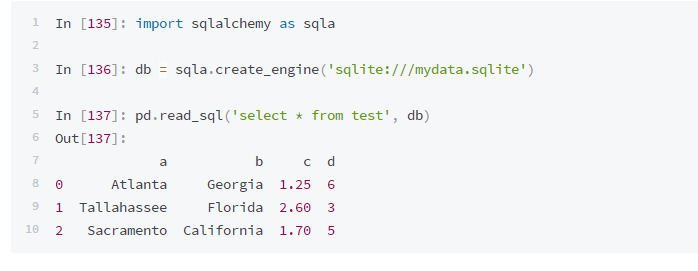